# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pd.set_option('display.max_rows', None)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
city_type_ride_id = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
city_type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
city_type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
city_type_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fare


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_city = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_city 

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
#-----ASK----
average_fare_per_driver = city_type_fare/ city_type_driver_count 
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
          "Total Rides" : city_type_ride_id ,
          "Total Drivers": city_type_driver_count,
          " Total Fares": city_type_fare,
          " Average Fare per Ride": average_fare_per_city,
          "Average Fare per Driver": average_fare_per_driver})

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_df=pyber_data_df.groupby(["type","date"]).sum("fare")
new_df

fare        ride_id  driver_count
type     date                                                   
Rural    2019-01-01 09:45:36 $43.69  2424875833354             1
         2019-01-02 11:18:32 $52.12  3454018971635             1
         2019-01-03 19:51:01 $19.90  5559509612597             8
         2019-01-04 03:31:26 $24.88  4195619112933             8
         2019-01-06 07:38:40 $47.33  3849747342021             4
         2019-01-08 06:19:45 $19.39  5350347217506             1
         2019-01-09 15:30:35 $31.84  3730685356921             4
         2019-01-11 04:39:27 $16.42  8800556719157             6
         2019-01-14 07:09:17 $18.05  5405362355006             1
         2019-01-14 15:58:48 $54.10   432925983890             6
         2019-01-15 21:44:26 $30.26  3837056996776             1
         2019-01-18 00:46:28 $15.12  1031697508349             6
         2019-01-18 07:36:46 $43.57  1174957961925             4
         2019-01-19 11:40:46 $49.44    90058815985             1
         2019-01-19 12:38:07 $38.68   103217578833             6
         2019-01-19 20:21:54 $56.78  1253403506597             7
         2019-01-22 12:42:55 $13.50  8493335787500             2
         2019-01-22 15:36:24 $10.11  4129933467653             6
         2019-01-23 06:52:00 $40.24  3921870176169             8
         2019-01-24 13:32:12 $34.74  5962674963447             2
         2019-01-27 17:33:41 $42.68  7994603753131             2
         2019-01-27 18:43:05 $38.42   862622008020             6
         2019-01-28 15:55:33 $31.25  7118046558393             7
         2019-01-30 00:05:47 $20.76  9018727594352             2
         2019-01-30 01:40:16 $37.05  9545375482385             7
         2019-01-30 10:55:23 $51.39  1328274868072             7
         2019-01-31 17:57:25 $58.29   623154556195             1
         2019-02-01 08:59:24 $17.05  9481117811603             1
         2019-02-02 06:28:04 $53.07  2462950442268             4
         2019-02-02 14:54:00 $12.42  1985256326182             8
         2019-02-03 17:15:31 $51.80  5383427508621             6
         2019-02-04 16:29:23 $13.97  7118893881453             4
         2019-02-04 23:54:51 $45.70  3570428225530             2
         2019-02-05 22:53:21 $45.02  7075366458478             1
         2019-02-10 21:03:50 $11.11  2781339863778             1
         2019-02-11 05:42:29 $25.78  9010611749008             9
         2019-02-16 17:02:51 $39.46  4571476032148             8
         2019-02-17 04:42:56 $30.58  6835140871685             4
         2019-02-18 18:27:48 $36.16  2928337561347             7
         2019-02-18 22:21:26 $34.32  8881996813087             7
         2019-02-19 00:23:09 $32.72  1481751072369             1
         2019-02-19 03:52:47 $58.55  8004803682564             9
         2019-02-20 16:32:36 $44.29  3622365199969             7
         2019-02-21 19:16:48 $55.40  8822356392057             1
         2019-02-22 01:46:43 $33.38  5551691454078             4
         2019-02-22 09:01:37 $17.40  8702491506161             4
         2019-02-23 12:00:59 $37.05  2068423024643             7
         2019-02-23 21:12:24 $47.90  3269652929887             2
         2019-02-24 00:44:00 $21.89  2069309881916             6
         2019-02-25 04:10:19 $16.18  8492924830016             2
         2019-02-25 19:06:00 $54.66  3137562921713             1
         2019-02-25 23:46:02 $28.65  5815763839331             4
         2019-02-26 07:03:11 $54.66  9201585331171             4
         2019-03-02 21:04:10 $20.99  5766454453070             4
         2019-03-05 04:46:17 $29.45  2159383884146             1
         2019-03-05 21:19:53 $38.18  8555320757742             1
         2019-03-06 09:09:23 $44.17  1152195873170             1
         2019-03-06 20:06:51 $48.11  2570548892682             4
         2019-03-06 21:44:53 $19.74  6080367372860             7
         2019-03-07 19:10:13 $48.79  9730627367446             7
 

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_df = new_df.reset_index()
new_df


,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,$43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,$52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,$19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,$24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,$47.33,3849747342021,4
5,Rural,2019-01-08 06:19:45,$19.39,5350347217506,1
6,Rural,2019-01-09 15:30:35,$31.84,3730685356921,4
7,Rural,2019-01-11 04:39:27,$16.42,8800556719157,6
8,Rural,2019-01-14 07:09:17,$18.05,5405362355006,1
9,Rural,2019-01-14 15:58:48,$54.10,432925983890,6


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_ = new_df.pivot(index="date", columns="type", values="fare")
df_


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_loc = df_.loc["2019-01-01":"2019-04-28"]
df_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_loc.index = pd.to_datetime(df_loc.index)
df_loc





type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
df_loc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week = df_loc.resample("W").sum()
fares_by_week.head()


type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"


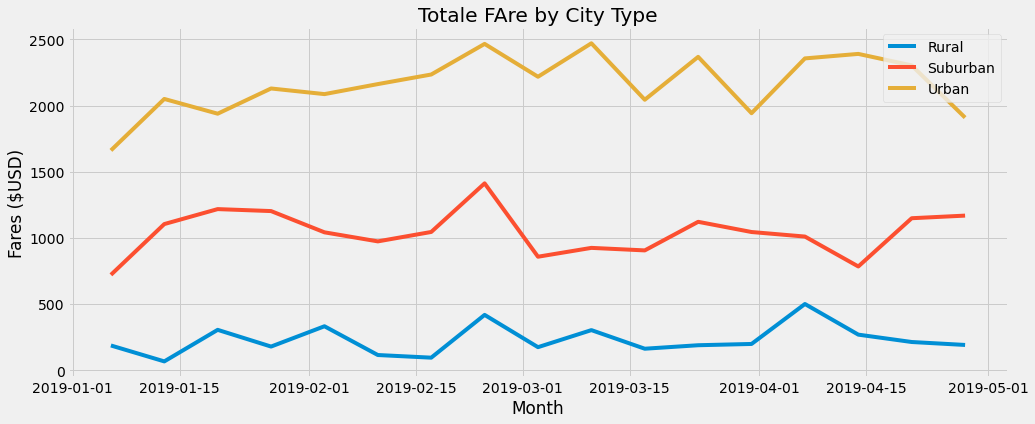

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import datetime
df1 = fares_by_week.reset_index()
#df1 = fares_by_week.groupby(fares_by_week['date'].dt.to_period('M')).sum()
fig, ax = plt.subplots(figsize=(15, 6))
#ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in fares_by_week.index]
ax.plot(fares_by_week)
ax.set(title ="Totale FAre by City Type",
       ylabel="Fares ($USD)", 
       xlabel= "Month")
plt.legend(fares_by_week)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("PyBer_fare_summary.jpg")

